In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import data_quality_report, plot_conversion_rate_stacked_bar

file_path = 'bank-full.csv'
cols_to_cat = ['job', 'marital',  'education', 'contact', 'month', 'poutcome']
cols_to_binary = ['loan','housing','default','y']

In [2]:
## read in data
df = pd.read_csv(file_path, sep=";")

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
data_quality_report(df)

,Data Type,Missing Values,Missing %,Unique Values,Sample Values,Mean,Std,Min,Max
age,int64,0,0.0,77,"[58, 44, 33]",40.936210,10.618762,18.0,95.0
day,int64,0,0.0,31,"[5, 6, 7]",15.806419,8.322476,1.0,31.0
poutcome,object,0,0.0,4,"[unknown, failure, other]",NaN,NaN,NaN,NaN
previous,int64,0,0.0,41,"[0, 3, 1]",0.580323,2.303441,0.0,275.0
pdays,int64,0,0.0,559,"[-1, 151, 166]",40.197828,100.128746,-1.0,871.0
campaign,int64,0,0.0,48,"[1, 2, 3]",2.763841,3.098021,1.0,63.0
duration,int64,0,0.0,1573,"[261, 151, 76]",258.163080,257.527812,0.0,4918.0
month,object,0,0.0,12,"[may, jun, jul]",NaN,NaN,NaN,NaN
contact,object,0,0.0,3,"[unknown, cellular, telephone]",NaN,NaN,NaN,NaN
job,object,0,0.0,12,"[management, technician, entrepreneur]",NaN,NaN,NaN,NaN


In [6]:
# Check duplicate rows 
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")
# print(duplicates)

Number of duplicate rows: 0


In [16]:
# df.dtypes

In [8]:
# convert column types
df[cols_to_cat] = df[cols_to_cat].astype('category')
for col in cols_to_binary:
    df[col] = df[col].map({'no': 0, 'yes': 1}) 

##### some quick exploratory questions to investigate (limit the scope - time constraints)
1. how many clients subscribed (target split)?
2. select two categorical features to investigate: e.g. does any education level have more subscriptions?  (target those?). 
3. select numerical features to investigate: e.g. are there negative values or outliers? what trends can we see (day of the month)? how shall we handle these? (note: outliers and negative values not tested- time boxed EDA - tree based methods quite robust to this)

In [10]:
# how many subscriptions - 12% subscriptions - class imbalance needs to be handled (either in data or in model)
df.groupby('y')['y'].count()

y
0    39922
1     5289
Name: y, dtype: int64

/Users/karinagorasia/Downloads/bank+marketing/mastercard_karina/bank/utils.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, target]).size().unstack(fill_value=0)


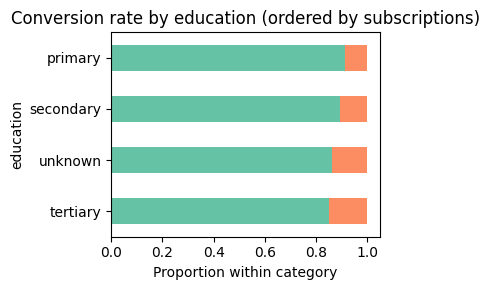

In [31]:
# generally the higher the education level, the greater the subscriptions - may be a meaningful feature
plot_conversion_rate_stacked_bar(df, col='education', target='y')    

/Users/karinagorasia/Downloads/bank+marketing/mastercard_karina/bank/utils.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([col, target]).size().unstack(fill_value=0)


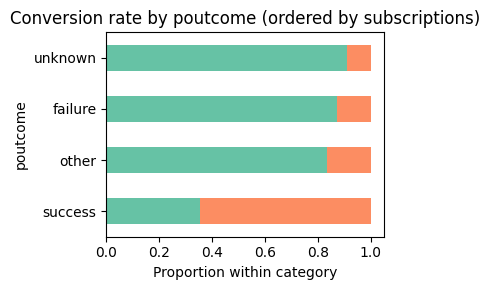

In [33]:
# subscribers who have previously responded successfully to campaigns have greateer subscriptions
plot_conversion_rate_stacked_bar(df, col='poutcome', target='y')    

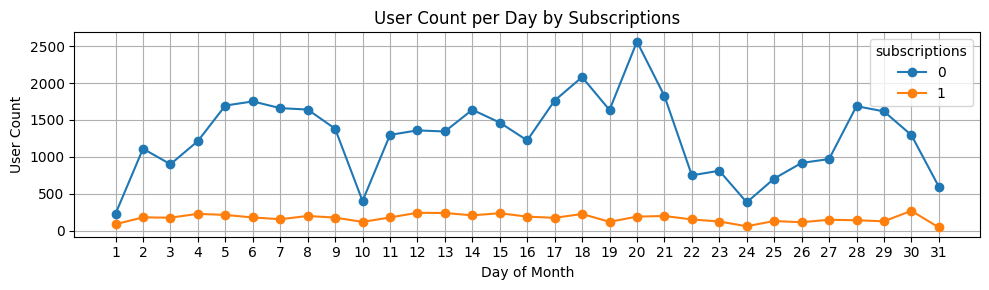

In [34]:
# are there more subscriptions at a particular time of month? (e.g. many at the beginning or end) - this could be a useful engineered feature
# finding: there is no discernable pattern. will not engineer a feature here.

counts = df.groupby(['day', 'y']).size().unstack(fill_value=0)

counts.plot(kind='line', marker='o', figsize=(10, 3))

# Plot styling
plt.title('User Count per Day by Subscriptions')
plt.xlabel('Day of Month')
plt.ylabel('User Count')
plt.xticks(range(1, 32))  # Days 1 to 31
plt.legend(title='subscriptions')
plt.grid(True)
plt.tight_layout()
plt.show()


y          0     1
pdays             
-1     33570  3384
 1         9     6
 2        35     2
 3         1     0
 4         1     1
...      ...   ...
 838       1     0
 842       0     1
 850       1     0
 854       0     1
 871       1     0

[559 rows x 2 columns]


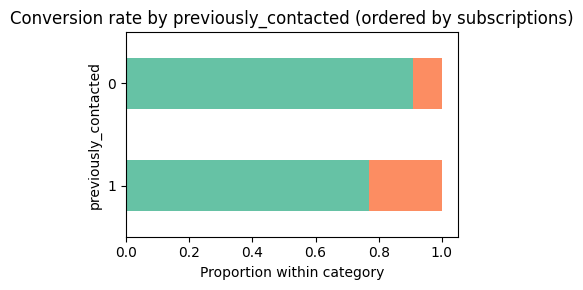

In [ ]:
# can we engineer pdays? contact after a week, after a month, etc
# hypothesis: people who have not previously been contacted may be more likely to subscribe (new offer?). could engineer a binary feature for previous contact Y/N
# (actually, the opposite appears a potential signal! - engagement = subscription?) 
counts = df.groupby(['pdays', 'y']).size().unstack(fill_value=0)
print(counts)

df['previously_contacted'] = (df['pdays'] != -1).astype(int)
plot_conversion_rate_stacked_bar(df, col='previously_contacted', target='y')  
